In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmaps
from scipy.integrate import solve_ivp

In [19]:
def lorenz(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

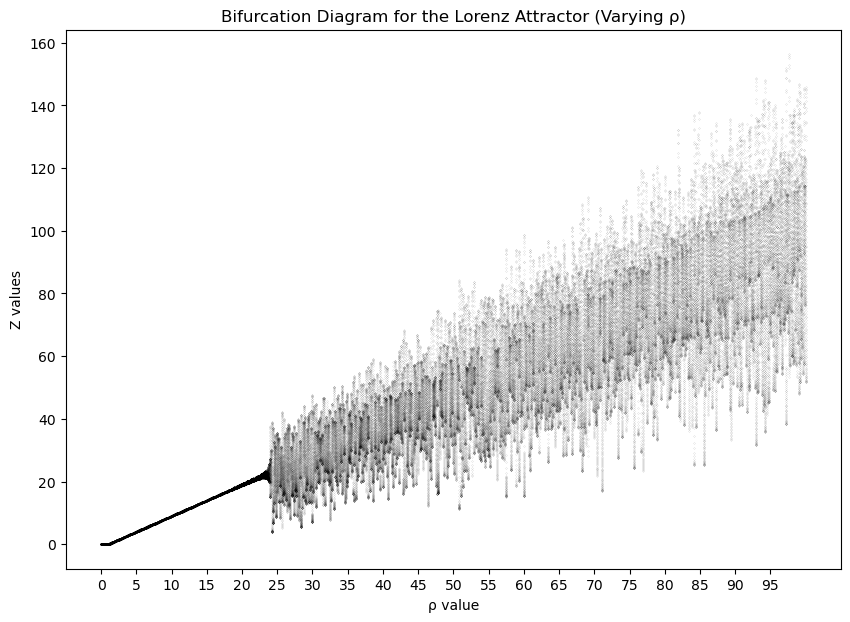

In [20]:
# Parameters
'''sigma, beta will stay the same as the ones lorenz used, whereas we will vary rho'''
sigma = 10.0
beta = 8.0 / 3.0
rho_values = np.linspace(0, 100, 1000)  # Range of rho values

# Initial conditions
initial_state = [1.0, 1.0, 1.0]
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Store bifurcation data
bifurcation_data = []

# Integrate for each rho
for rho in rho_values:
    sol = solve_ivp(lorenz, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval)
    z_values = sol.y[2]
    # Collecting data after transients
    bifurcation_data.append(z_values[-100:])

# Plotting the bifurcation diagram
plt.figure(figsize=(10, 7))
for i, rho in enumerate(rho_values):
    plt.plot([rho] * len(bifurcation_data[i]), bifurcation_data[i], 'k.', markersize=0.1)
plt.xticks(np.arange(0, 100, 5))
plt.xlabel('ρ value')
plt.ylabel('Z values')
plt.title('Bifurcation Diagram for the Lorenz Attractor (Varying ρ)')
plt.show()